In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scipy.stats as scs
from scipy import stats
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [85]:
import pandas as pd
df=pd.read_csv('case_study.csv', index_col=0)

In [86]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [ ]:
# We use 'DRVISITS' and 'NOCOV121' columns for research below

In [87]:
df['DRVISITS'].describe()

count    11354.000000
mean        14.991721
std         25.786279
min          1.000000
25%          2.000000
50%          4.000000
75%         10.000000
max         99.000000
Name: DRVISITS, dtype: float64

In [89]:
zero_drvisits = {88:0, 77: np.nan, 99: np.nan}
zero_nocov={7:np.nan, 9: np.nan, 1: True, 2: False}

df['DRVISITS'] = df['DRVISITS'].replace(zero_drvisits)
df['NOCOV121'] = df['NOCOV121'].replace(zero_nocov)

In [90]:
len(df['DRVISITS'])

34545

In [91]:
df['DRVISITS'].value_counts()

2.0     1728
3.0     1515
4.0     1425
1.0     1364
0.0      832
6.0      811
5.0      741
12.0     520
10.0     430
8.0      334
20.0     216
7.0      203
15.0     164
30.0      97
24.0      70
25.0      68
9.0       66
50.0      59
40.0      37
76.0      36
14.0      34
16.0      26
60.0      24
36.0      20
18.0      19
11.0      16
52.0      16
48.0      14
13.0      13
35.0      13
17.0       8
28.0       8
70.0       7
26.0       6
22.0       5
45.0       5
42.0       2
27.0       2
21.0       2
19.0       2
31.0       2
46.0       2
55.0       2
38.0       1
39.0       1
43.0       1
47.0       1
33.0       1
29.0       1
75.0       1
58.0       1
49.0       1
23.0       1
37.0       1
Name: DRVISITS, dtype: int64

In [92]:
df['NOCOV121'].value_counts()

False    10046
True       472
Name: NOCOV121, dtype: int64

In [93]:
df.dropna(subset=['DRVISITS','NOCOV121'], inplace=True)

In [94]:
len(df['DRVISITS'])

10161

In [95]:
len(df["NOCOV121"])

10161

In [96]:
df['DRVISITS'].describe()

count    10161.000000
mean         6.363252
std          9.022087
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         76.000000
Name: DRVISITS, dtype: float64

In [97]:
#1. - Create a confidence interval for a sample mean.

In [98]:
# 95% confidence interval of days people visit to doctor in the past year 
n=len(df['DRVISITS'])
mean=df['DRVISITS'].mean()
sdt=df['DRVISITS'].std()
t_value=scs.t.ppf(0.975,n-1)
margin_error = t_value*sdt/(n**0.5)
confidence_interval=(mean-margin_error, mean+margin_error)
confidence_interval

(6.18780760837899, 6.538695688540604)

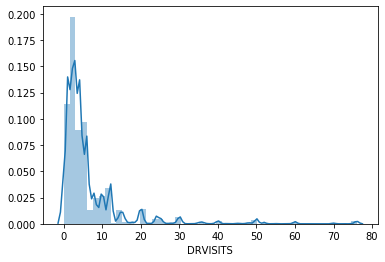

In [99]:
sns.distplot(df.DRVISITS);

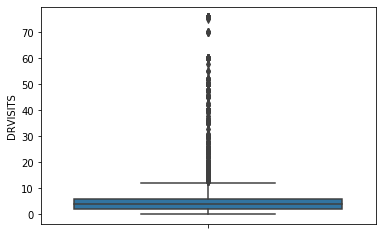

In [100]:
sns.boxplot(y=df['DRVISITS'])

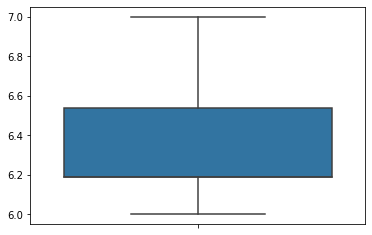

In [101]:
fake_data = [6, 6.18780760837899, 6.18780760837899, 6.18780760837899 ,6.18780760837899,
6.538695688540604, 6.538695688540604, 6.538695688540604, 7]
sns.boxplot(y=fake_data)

In [102]:
df['NOCOV121'].value_counts()

False    9707
True      454
Name: NOCOV121, dtype: int64

In [103]:
#2. - Create a confidence interval for a sample proportion.

In [104]:
454/10161

0.04468064166912705

In [105]:
sms.proportion_confint(454, 10161, alpha=0.05, method='normal')

(0.04066353045657347, 0.048697752881680635)

In [106]:
sms.DescrStatsW(df['NOCOV121']).tconfint_mean()

(0.040662854129353915, 0.04869842920890019)

In [107]:
#3. - Perform a two-sample test of means.

In [108]:
#Do men have less doctor visits than women?

In [109]:
# H0:x_bar(men) = x_bar(women), Ha:x_bar(men) < x_bar(women)
doctor_visit_sex = df.groupby('SEX')['DRVISITS'].describe()
doctor_visit_sex

,count,mean,std,min,25%,50%,75%,max
SEX,,,,,,,,
1.0,4188.0,5.904011,8.613887,0.0,2.0,3.0,6.0,76.0
2.0,5973.0,6.685250,9.284791,0.0,2.0,4.0,7.0,76.0


In [110]:
male_df =  df.loc[df['SEX'] == 1.0]
std1=male_df['DRVISITS'].std()

In [111]:
female_df =  df.loc[df['SEX'] == 2.0]
std2=female_df['DRVISITS'].std()

In [112]:
sp_square=(((4188-1)*std1**2)+((5973-1)*std2**2))/(4188+5973-2)

In [113]:
sp=sp_square**0.5
sp

9.014331007674564

In [114]:
male_df2 =  df.loc[df['SEX'] == 1.0]
mean1=male_df2['DRVISITS'].mean()


In [115]:
female_df2 =  df.loc[df['SEX'] == 2.0]
mean2=female_df2['DRVISITS'].mean()


In [116]:
t = (mean1-mean2)/(sp*(1/4188+1/5973)**0.5)
t

-4.300131024357648

In [117]:
#reject H0, x_bar(men) < x_bar(women)

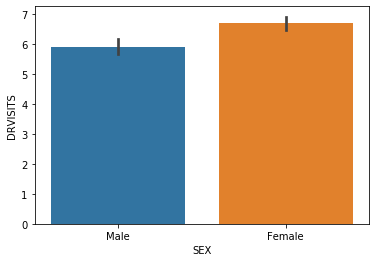

In [187]:
sns.barplot(y=df['DRVISITS'],x=df['SEX'])

In [118]:
# 4. - Perform a two sample test of proportions.

In [119]:
#     compare sex for nocov121
# Ho: There is no difference between males and females in rates of uninsuredness in past year
# Ha: There is a difference between males and females in rates of uninsuredness in past year
# alpha = 0.05
# splitting data based on male or female
# df['male'] = np.where(df['SEX'] == 1, 1, 0)
#  only_male_cov_prop = np.where(df['SEX'] == 1, df['covered'], 0)

In [120]:
only_male = df.loc[df['SEX'] == 1]
only_females = df.loc[df['SEX'] == 2]

In [121]:
scs.ttest_ind(only_male['NOCOV121'], only_females['NOCOV121'])

Ttest_indResult(statistic=0.6708576714847715, pvalue=0.5023264551308473)

In [122]:
"""With 95% confidence, we can say that a similarly chosen sample of people from NY, NJ, 
and CT will have similar rates of lacking health insurance over the course of a year 
between men and women"""

'With 95% confidence, we can say that a similarly chosen sample of people from NY, NJ, \nand CT will have similar rates of lacking health insurance over the course of a year \nbetween men and women'

In [123]:
only_male['NOCOV121'].mean()

0.04632282712511939

In [124]:
# changing values in df so they map correctly to xlabels
male_female_dict = {1.0:'Male', 2.0:'Female'}
df['SEX'].replace(male_female_dict, inplace=True)

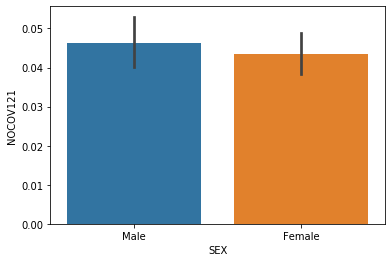

In [125]:
## Not sure how to do bar chart lol
sns.barplot(y = df['NOCOV121'],
           x = df['SEX'])

In [126]:
# 5. - Perform a Chi-Square test

In [127]:
# H0: There is no difference between the amount people smoke and the amount of doctor
# visits they have over the course of a year 
# Ha: There is a difference between the amount people smoke and the amount of doctor
# visits they have over the course of a year 
# alpha = 0.05

In [220]:
df['smoking'] = np.where(df['SMOKE100']==2, 3, df['SMOKDAY2'])

In [221]:
df['smoking'].value_counts()

3.0    8597
1.0     778
2.0     387
9.0       3
7.0       1
Name: smoking, dtype: int64

In [222]:
def bin_drvisit(df):
    if df['DRVISITS'] == 0:
        return 'Never visit doctor'
    elif 1 <= df['DRVISITS'] < 5:
        return 'Sometimes visit doctor'
    else:
        return 'Often visit doctor'

In [223]:
df['num_doc_visits'] = df.apply(bin_drvisit, axis=1)

In [224]:
smok_dict={7:np.nan, 9:np.nan}
df['smoking'].replace(smok_dict, inplace=True)

In [225]:
df['smoking'].dropna(inplace=True)

In [226]:
df['smoking'].unique()

array([3., 1., 2.])

In [227]:
smoke_names_dict = {1.0: "Often smokes", 2.0: "Sometimes smokes", 3:"Never smokes"}
df['smoking'].replace(smoke_names_dict, inplace=True)

In [228]:
grouped_smok_vis =df.groupby(['num_doc_visits','smoking']).num_doc_visits.count()

In [229]:
grouped_smok_vis.values

array([ 446,   66,   20, 3342,  342,  151, 4809,  370,  216])

In [230]:
list1 = [i for index, i in enumerate(grouped_smok_vis.values) if index %3 == 0]

In [231]:
list2 = [i for index, i in enumerate(grouped_smok_vis.values) if index % 3 == 1]

In [232]:
list3 = [i for index, i in enumerate(grouped_smok_vis.values) if index % 3 == 2]


In [233]:
table = [list1, list2, list3]
table

[[446, 3342, 4809], [66, 342, 370], [20, 151, 216]]

In [234]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

dof=4
[[ 468.51096087 3377.32995288 4751.15908625]
 [  42.39868879  305.63716452  429.96414669]
 [  21.09035034  152.03288261  213.87676706]]


In [235]:
prob = 0.95
critical = chi2.ppf(prob, dof)

In [236]:
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

probability=0.950, critical=9.488, stat=28.067
Dependent (reject H0)


In [241]:
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

significance=0.050, p=0.000
Dependent (reject H0)


In [238]:
# Reject the null hypothesis showing that there is a significant difference between the amount people
# smoke and the amount of times they visit the doctor 

Text(0.5, 1.0, 'Relationship Between Smoking and Doctor Visit Frequency in Past Year')

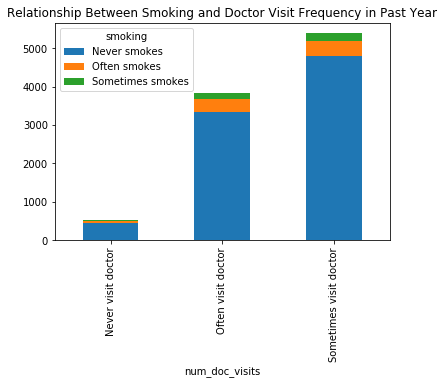

In [239]:
# graphic 
grouped_smok_vis.unstack().plot(kind = 'bar', stacked = True)
plt.title("Relationship Between Smoking and Doctor Visit Frequency in Past Year")

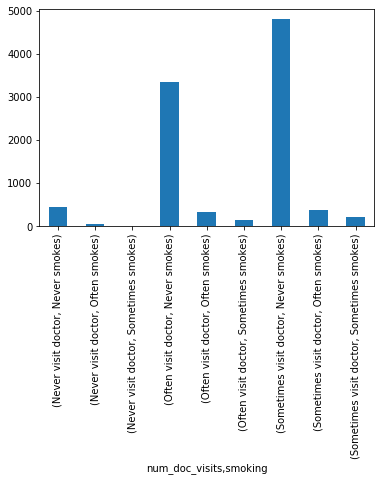

In [240]:
grouped_smok_vis.plot(kind = 'bar', stacked = True)

In [148]:
# 6. - Perform a one-way ANOVA

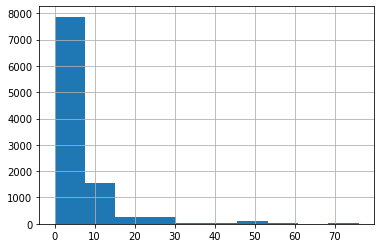

In [149]:
df['DRVISITS'].hist()

In [171]:
insur_dict = {1: "Bought through employer", 2: "Bought independently", 3: "Government provided",
              4: "Government provided", 5: "Government provided", 6: np.nan, 7: np.nan, 8:np.nan, 77:np.nan,
              99:np.nan}

df['insurance_provider'] = df["HLTHCVR1"].replace(insur_dict)

In [172]:
len(df['insurance_provider'])

10161

In [152]:
df['insurance_provider'].dropna(inplace=True)

In [173]:
len(df['insurance_provider'])

10161

In [174]:
len(df)

10161

In [185]:
bought_ind = df.loc[df['insurance_provider'] == "Bought independently"]

In [176]:
govt_bought = df.loc[df['insurance_provider'] == "Government provided"]

In [177]:
emp_bought = df.loc[df['insurance_provider'] == "Bought through employer"]
emp_bought

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,smoking,num_doc_visits,insurance_provider
273404,34.0,2.0,3262017,3,26,2017,1200.0,2017000121,2.017000e+09,1.0,...,9.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,Sometimes,Bought through employer
273406,34.0,2.0,3262017,3,26,2017,1100.0,2017000123,2.017000e+09,1.0,...,4.0,2.0,1.0,1.0,NaN,NaN,1.0,3.0,Often,Bought through employer
273410,34.0,2.0,5182017,5,18,2017,1100.0,2017000127,2.017000e+09,1.0,...,3.0,2.0,1.0,1.0,NaN,NaN,2.0,3.0,Sometimes,Bought through employer
273411,34.0,3.0,6192017,6,19,2017,1100.0,2017000128,2.017000e+09,1.0,...,1.0,1.0,1.0,1.0,NaN,NaN,2.0,2.0,Sometimes,Bought through employer
273413,34.0,3.0,6062017,6,6,2017,1100.0,2017000130,2.017000e+09,1.0,...,4.0,2.0,1.0,1.0,NaN,NaN,2.0,3.0,Sometimes,Bought through employer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284769,34.0,12.0,12282017,12,28,2017,1100.0,2017011497,2.017011e+09,NaN,...,1.0,1.0,1.0,1.0,NaN,NaN,2.0,3.0,Often,Bought through employer
284771,34.0,12.0,1022017,1,2,2017,1100.0,2017011499,2.017011e+09,NaN,...,1.0,1.0,1.0,1.0,NaN,NaN,1.0,3.0,Sometimes,Bought through employer
284774,34.0,12.0,12272017,12,27,2017,1100.0,2017011502,2.017012e+09,NaN,...,1.0,1.0,1.0,1.0,NaN,NaN,9.0,3.0,Never,Bought through employer
284775,34.0,12.0,12292017,12,29,2017,1100.0,2017011503,2.017012e+09,NaN,...,4.0,2.0,1.0,1.0,NaN,NaN,2.0,3.0,Often,Bought through employer


In [186]:
stats.f_oneway(bought_ind['DRVISITS'],govt_bought['DRVISITS'],emp_bought['DRVISITS'])

F_onewayResult(statistic=61.70179071325623, pvalue=2.3517895521422863e-27)

In [204]:
# We are very certain that there is a difference in frequency of visiting the doctor over the course
# of a year depending on the type of insurance that they have

Text(0, 0.5, 'Number of Doctor Visits (per year)')

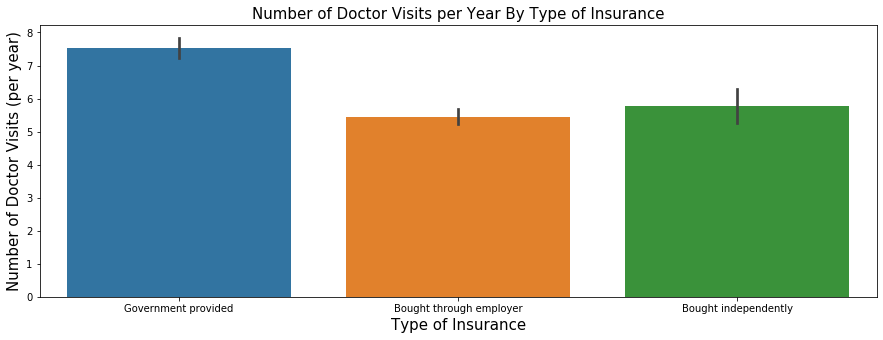

In [206]:
plt.figure(figsize=(15,5))
sns.barplot(x = df['insurance_provider'], y = df['DRVISITS'])
plt.title("Number of Doctor Visits per Year By Type of Insurance",fontsize = 15)
plt.xlabel("Type of Insurance",fontsize = 15)
plt.ylabel("Number of Doctor Visits (per year)",fontsize = 15)